# K-means Clustering

In [1]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# import sklearn libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Importing the data from the customers dataset.

In [2]:
# import customers.csv dataset
customers = pd.read_csv('datasets/customers.csv')

# check the head of the dataset
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We will only use the last 3 columns of the dataset for this example, so let's slice it accordingly:

In [3]:
# separate last three columns from the dataset
X = customers.iloc[:, 2:]

# check the head of the dataset
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


We visualize the data using a scatter plot to get a sense of the data before clustering.

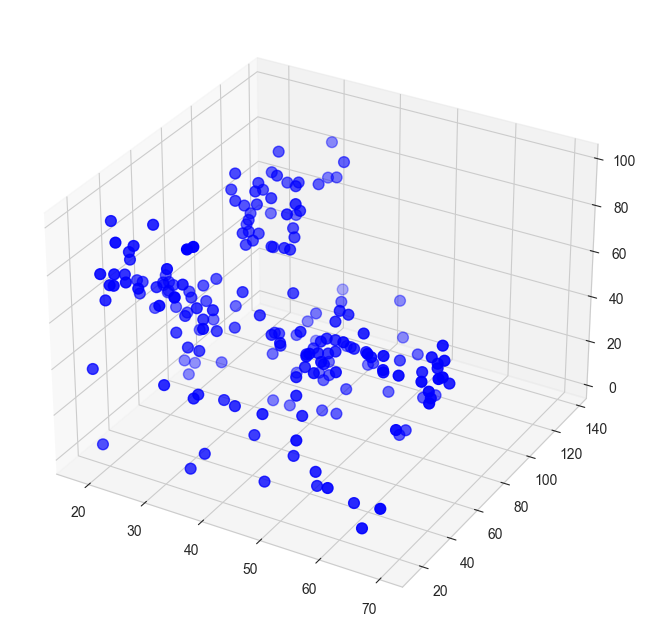

In [4]:
# plot X in a 3D scatter plot using sns
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', s=60)

In [5]:
# graph X using plotly
fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)')
fig.show()

Find optimal number of clusters using the elbow method.

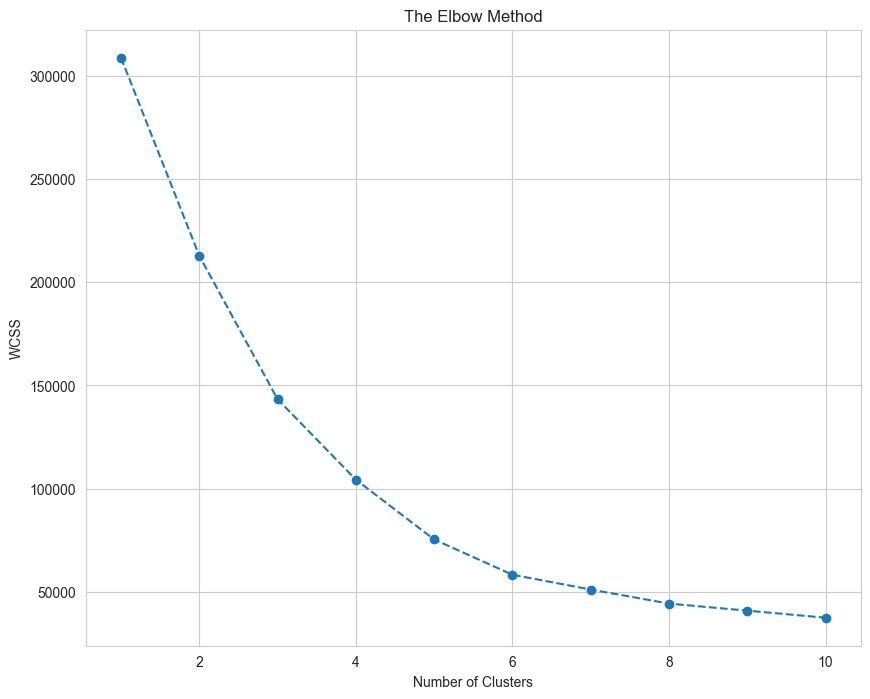

In [6]:
# use the elbow method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the elbow method
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

6 clusters seems to be a good choice.

In [7]:
# train the K-Means model on the dataset with 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# add y_kmeans to a copy of the dataset
X_res = X.copy()
X_res['Cluster'] = y_kmeans

In [8]:
# plot using plotly
fig = px.scatter_3d(X_res, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')
fig.show()

We can try 5 clusters as well.

In [9]:
# train the K-Means model on the dataset with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_2 = kmeans.fit_predict(X)

# add y_kmeans to a copy of the dataset
X_res_2 = X.copy()
X_res_2['Cluster'] = y_kmeans_2

In [10]:
# plot using plotly
fig = px.scatter_3d(X_res_2, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')
fig.show()